# Feature selection

In [2]:
import pandas as pd
import numpy as np
import torch
import os
os.chdir('/home/jiageng/Documents/fhr/pipeline/')
import snf
from sklearn.feature_selection import *

In [3]:
fhr_data = pd.read_csv('../annotations/fhr-annotations.tsv',sep='\t').set_index('PUBLIC_ID').query('risk != -1')
fhr_data['risk'] += 1

In [4]:
# subset to samples with fhr labels
rnamat = pd.read_csv('../matrices/gene_exp_matrix.tsv',sep='\t').set_index('PUBLIC_ID').drop(columns=['SAMPLE'])

In [5]:
public_ids = list(set(fhr_data.index).intersection(set(rnamat.index)))
print(len(public_ids))

701


In [6]:
def stdNormalize(df):
    numeric_df = df.select_dtypes(include=[np.number])
    std = numeric_df.std().fillna(1)
    mean = numeric_df - numeric_df.mean()
    numeric_df_norm = mean / std
    nonnumeric_df = df.select_dtypes(exclude=[np.number])
    df_norm = pd.concat([nonnumeric_df, numeric_df_norm], axis=1)
    return df_norm

In [9]:
X = stdNormalize(rnamat).loc[public_ids]
y = fhr_data.loc[public_ids,'risk']

Feature selection by specifying FDR of 0.05

In [91]:
print(X.shape)
fdr = SelectFdr(f_classif, alpha=0.05).fit(X, y)
X_new = fdr.transform(X)
print(X_new.shape)

(701, 18625)
(701, 8141)


In [92]:
rnamat_fdr = rnamat[fdr.get_feature_names_out()]
rnamat_fdr.shape

(806, 8141)

Feature selection by mutual information

In [74]:
mifo = mutual_info_classif(X, y)

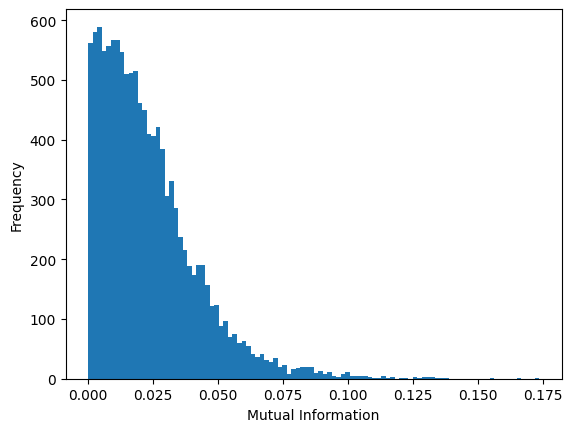

In [76]:
import matplotlib.pyplot as plt

plt.hist(mifo[mifo>0], bins=100)
plt.xlabel('Mutual Information')
plt.ylabel('Frequency')
plt.show()

In [121]:
len(mifo[mifo > 0.1])

63

In [122]:
genes_mifo = set(X.columns[np.where(mifo > 0.1)])
genes_fdr = set(rnamat_fdr.columns)
overlap = genes_fdr.intersection(genes_mifo)
print(len(overlap))

63


In [123]:
rnamat[list(overlap)].to_csv('../matrices/gene_exp_matrix_mi1e2.tsv',sep='\t')

In [14]:
ensgid = pd.read_csv('../annotations/ensgid-autosomal-proteincoding.txt',sep='\t').set_index('Gene stable ID')

In [15]:
for gname in ensgid.loc[list(overlap)]['Gene name']:
    print(gname)

NameError: name 'overlap' is not defined

Feature selection by K best method

In [10]:
k=200
print(X.shape)
kbest = SelectKBest(f_classif, k=k).fit(X,y)
X_new = kbest.transform(X)
print(X_new.shape)

(701, 18625)
(701, 200)


In [11]:
rnamat_k = rnamat[kbest.get_feature_names_out()]
rnamat_k.shape

(806, 200)

In [12]:
rnamat_k.to_csv(f'../matrices/gene_exp_matrix_k{k}.tsv',sep='\t')

In [16]:
pd.set_option('display.max_rows', 500)
ensgid.loc[kbest.get_feature_names_out()]
pd.set_option('display.max_rows', 20)

KCNG1
MYOM2
DSG2
LTBP1
PKP2
RPL18
CDON
PFKP
FGFR3
PVR
NUAK1
ADD2
PAX2
RBFOX1
KCNN2
IGSF9B
TFAP2C
FH
BAMBI
PCSK5
PAK5
ZNF516
CORO1A
METRN
JPH1
TRPS1
OLFM2
RPS16
APLP1
NOP53
CLEC11A
CLIP2
SH3GL2
ABCA2
ATRNL1
RPL34
NSD2
VWA5A
CCND1
PLSCR4
CHST10
PAPPA2
SCAMP3
KIF21B
GPR89A
APH1A
CCND2
TTLL2
RPL21
RPL5
TWIST1
NEUROG3
PFDN5
PLAAT1
GNAI1
FOXA1
SH3BP4
GADD45G
KCNC3
CDC73
TIMM17A
DTNA
TBX3
CTSV
C6orf52
FAM13A
FBN2
NOVA1
PIF1
RPS2
RPL13A
TIPRL
ILDR2
UFC1
PFDN2
PRCC
MRPL24
HDGF
SF3B4
TARS2
ANP32E
ENSA
MRPL9
SMYD2
SUSD4
ATP8B2
JTB
TPM3
ILF2
ARF1
GUK1
CDC42BPA
MEIS1
LRIG1
MYH15
MYO10
PCYOX1L
RPS3
ALDOA
MAGI1
TMEM123
MR1
CLGN
HNRNPU
RETREG1
ADAMTS1
USP43
AGAP1
AUTS2
DEDD
PSMD4
SHC1
UBE2Q1
FDPS
PMF1
AZGP1
FBXO27
MPP3
RPL26
PRKAA2
SLC45A1
HFM1
ARPC5
TRIM58
H3-3A
PMVK
PBXIP1
ABLIM2
NSA2
RPS14
HSPA12A
JAM3
LARP6
SCN3B
SERPINB8
CDYL2
KLK13
RAB26
IRF2BP2
DYNLRB2
SLC50A1
SCN9A
SOCS6
RPS9
ZNF581
MTX1
CCDC106
TLR10
SH3BP5L
CHRNA7
DPP10
GJC3
KBTBD11
FAM89B
DPP7
FZD8
RPLP2
MAF
C14orf39
RCC2
DPM3
NRIP1
BACE2
S